<a href="https://colab.research.google.com/github/KrishnanTGB/Statistical-Analysis-using-ML-Algorithms/blob/master/CWC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

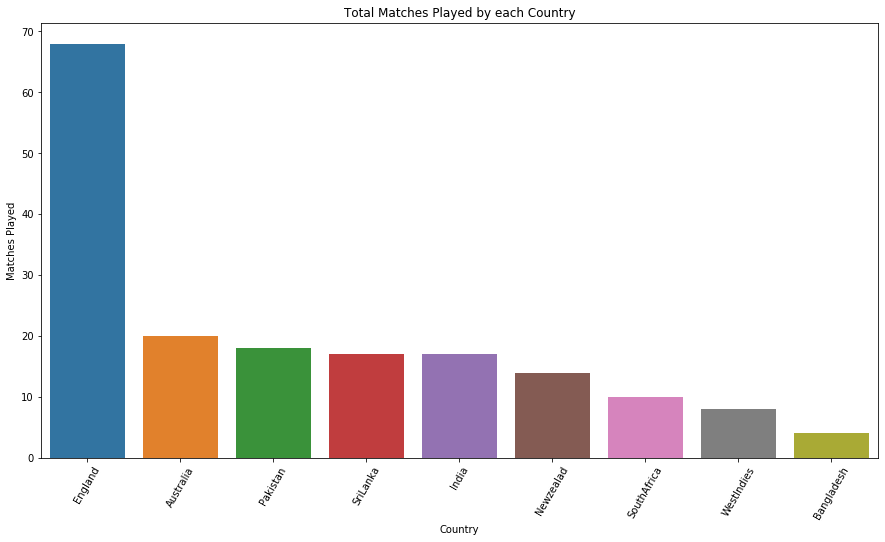

In [3]:
# Dataset - ODI_DATASET.csv
# Starting from Jan-2013 to mid May-2019 - all the ODI results are included in this dataset

import warnings
warnings.filterwarnings('ignore')

# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# ODI dataset from Jan-2013 to May-2019
# As I have used Google Colab to perform this notebook - hence added github raw URL to fetch the dataset

ODI_Data = pd.read_csv('https://raw.githubusercontent.com/nimitsolanki/Cricket-World-Cup-2019/master/data/ODI_DATASET.csv')


# Scores_ID

ODI_Data["Scores_ID"] = ODI_Data["Unnamed: 0"]
ODI_Data.drop(columns="Unnamed: 0",inplace=True)


# CWC-2019 pitches

WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
          WC_Ground_Stats.append((i,j))   
          
          
          
# Listing ground names

Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names


{'Birmingham': 'Edgbaston, Birmingham',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London'}
 
 # Matching ODI's data with respect to the above listed grounds

WC_Grounds_History = ODI_Data[ODI_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()


# Finding the World cup team's played on these grounds

Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

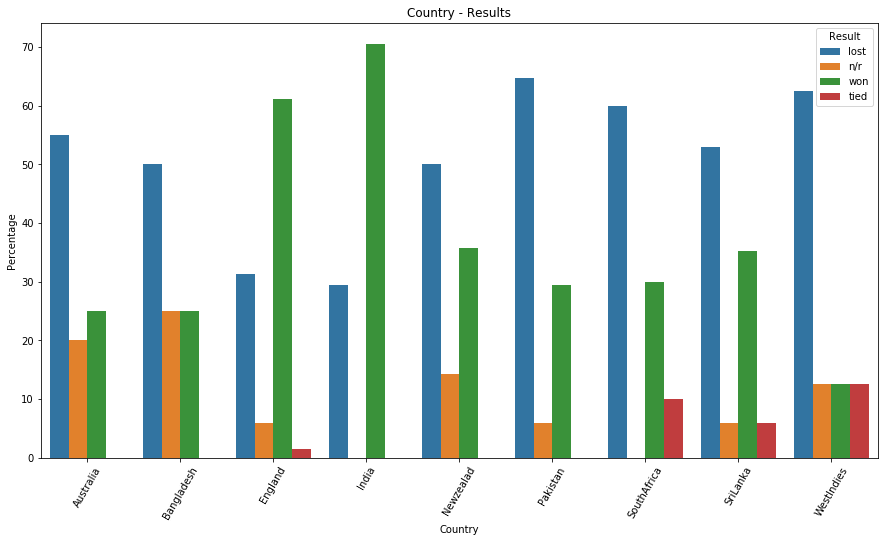

In [4]:
# Team wise Winning Percentage in England Pitches after removing the currupt data result

WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

# Country results in percentage 

winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

# Plotting Results in percentage

plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

Text(0.5, 0, 'India')

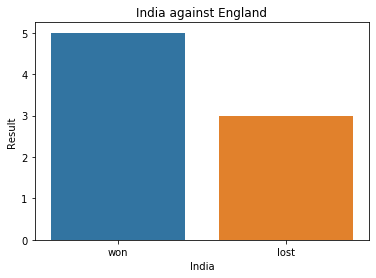

In [5]:
# It's clear that India and England have highest Green bars - highest winning percentage.

# Let's see what happens when the Top Two Teams face?


India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "India"]\
[WC_Grounds_History.Opposition.str.contains("England")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("India against England")
plt.xlabel("India")